## Let us start by importing the usual suspects:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Lets load the file and display the head of the file.

In [2]:
dataset = pd.read_excel('file1.xlsx',index_col="Observations")
dataset.head()

,Sales Transaction,Family Income,Family Size,Number of Vehicles,Distance to Store (KM),Number of items
Observations,,,,,,
1,357.725155,172141,4,3,15,65
2,276.838196,145916,2,1,4,39
3,197.923216,86185,1,2,14,21
4,315.747112,145998,3,1,8,35
5,202.893457,79341,1,2,19,42


In [3]:
#checking for any missing values
dataset.isnull().sum()

 Sales Transaction        0
Family Income             0
Family Size               0
Number of Vehicles        0
Distance to Store (KM)    0
Number of items           0
dtype: int64

In [4]:
#checking the general information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Sales Transaction      150 non-null    float64
 1   Family Income           150 non-null    int64  
 2   Family Size             150 non-null    int64  
 3   Number of Vehicles      150 non-null    int64  
 4   Distance to Store (KM)  150 non-null    int64  
 5   Number of items         150 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 8.2 KB


In [5]:
#checking the distribution of the data.
dataset.describe()

,Sales Transaction,Family Income,Family Size,Number of Vehicles,Distance to Store (KM),Number of items
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,224.447441,106991.180000,2.073333,1.566667,7.693333,33.766667
std,88.444444,32966.504942,1.285420,0.922621,5.287629,16.734571
min,63.340000,62712.000000,1.000000,0.000000,1.000000,4.000000
25%,167.954659,82249.250000,1.000000,1.000000,3.000000,22.000000
50%,210.181124,95516.000000,2.000000,1.000000,7.500000,32.000000
75%,273.117591,127091.500000,3.000000,2.000000,11.750000,42.750000
max,501.230000,257678.000000,6.000000,3.000000,25.000000,98.000000


<AxesSubplot:xlabel=' Sales Transaction', ylabel='Density'>

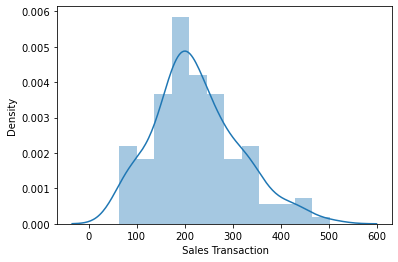

In [6]:
sns.distplot(dataset[' Sales Transaction'])

<AxesSubplot:xlabel='Family Income', ylabel='Density'>

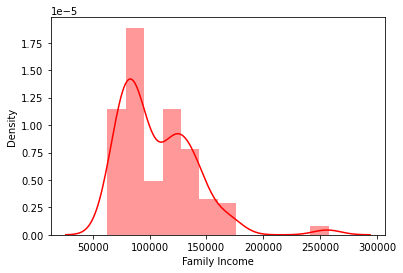

In [7]:
sns.distplot(dataset['Family Income'], color = 'red')

<AxesSubplot:xlabel='Number of items', ylabel='Density'>

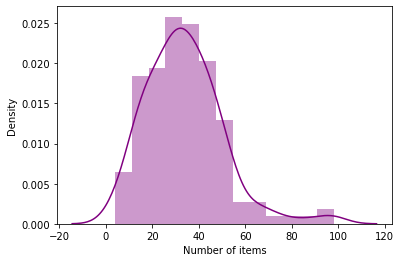

In [8]:
sns.distplot(dataset['Number of items'], color = 'purple')

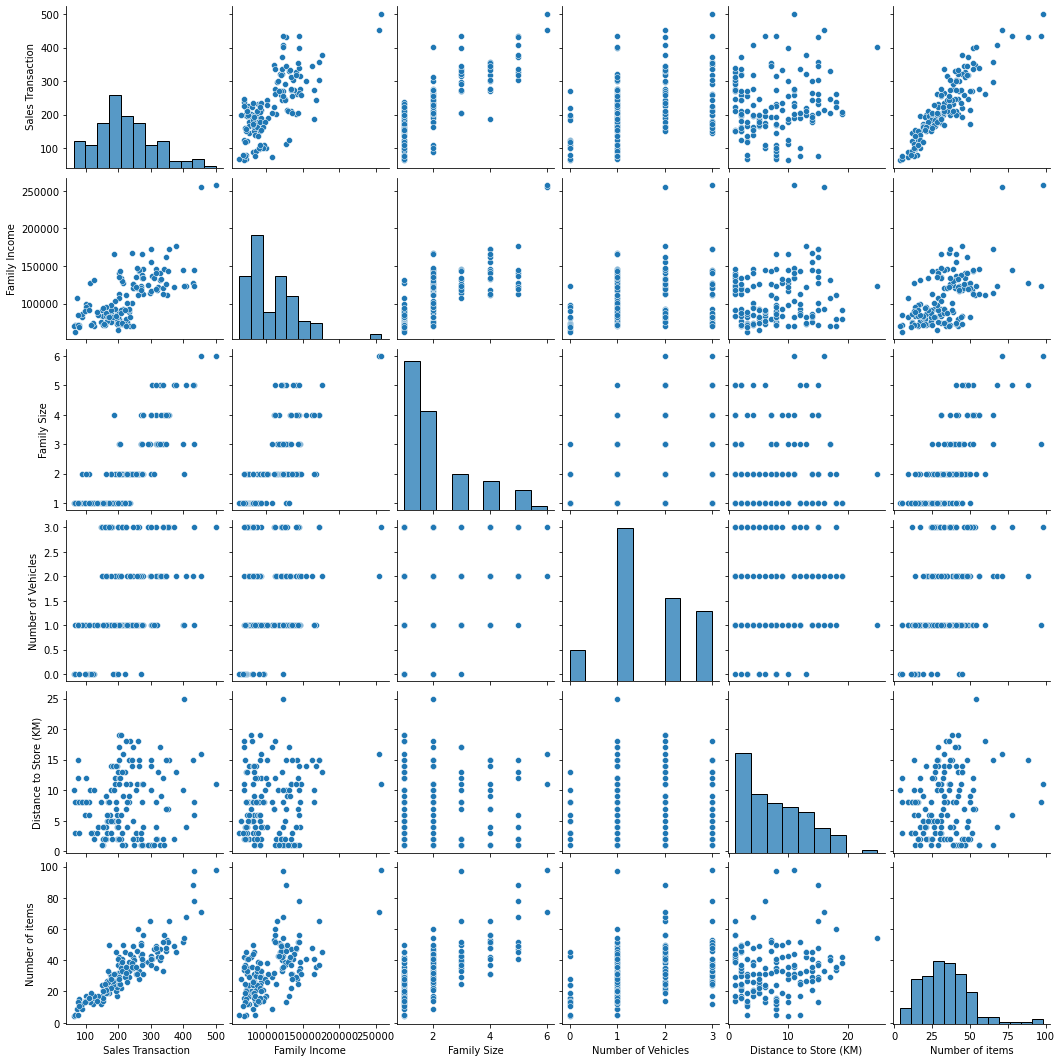

In [9]:
#creating a pairplot to see the associations bwtween all elements:
sns.pairplot(dataset)

In [10]:
#plotting the correlation matrix
dataset.corr()

,Sales Transaction,Family Income,Family Size,Number of Vehicles,Distance to Store (KM),Number of items
Sales Transaction,1.000000,0.707872,0.806880,0.376092,0.142694,0.890872
Family Income,0.707872,1.000000,0.748616,0.193893,0.150639,0.587424
Family Size,0.806880,0.748616,1.000000,0.270315,0.033941,0.702176
Number of Vehicles,0.376092,0.193893,0.270315,1.000000,0.011097,0.377235
Distance to Store (KM),0.142694,0.150639,0.033941,0.011097,1.000000,0.137303
Number of items,0.890872,0.587424,0.702176,0.377235,0.137303,1.000000


<AxesSubplot:>

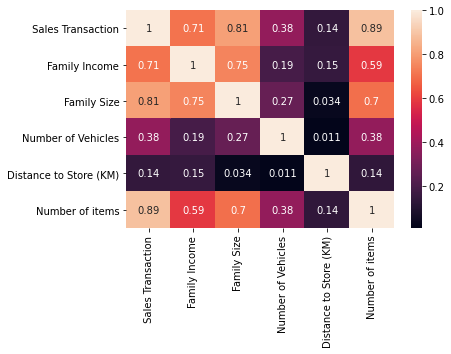

In [11]:
#plotting the same information in a heatmap:
sns.heatmap(dataset.corr(), annot = True)

In [12]:
#Defining the predictors and the predicted variable
X = dataset.iloc[:,1:].values    #independent variables
y = dataset.iloc[:,0].values     #dependent variable

In [13]:
#splitting the data into training and testing data:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [14]:
#training our model on the training data.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
#predicting the values based on our model
y_pred = regressor.predict(X_test)

In [16]:
#lets plot some of the values that are estimated and write them against the actual values:

for i,j in np.nditer((y_test, y_pred)):
    print(i,"      ", j)  # compare actual price vs predicted price

220.74529248209018        222.67865593389877
320.7187197681414        272.92235820013923
67.45        98.01746811047748
210.00506409256133        219.19347117926444
211.91258637014442        220.14297195785048
193.93880968902909        148.67165200933275
304.71789784629766        297.76207432207264
79.31        106.38310854955498
258.39320148001855        273.6488833332295
200.45735284406965        222.15861066116602
112.35        152.56224504712577
210.35718350944995        198.78917543100687
247.30062689651618        234.8944790591802
125.05297512556575        122.26754901780897
340.4930378640803        340.6228949660323
178.45688077502973        192.16682164118566
75.0        128.53135027258503
163.95721452484383        172.61664012857554
167.12975678320043        159.2629298892153
273.45        273.5158242182035
298.8817797906903        339.0464994735137
453.4        482.45161320302304
165.03365954914779        175.02962603023323
176.98        200.14731914321996
202.09        225.4

In [17]:
#lets see if the model is overfitting or not
print(regressor.score(X_train, y_train))
print(regressor.score(X_test,y_test))

#the values suggest that the model is ok and not overfitting

0.8545147538767731
0.9139302377085102


In [18]:
import statsmodels.api as sm
#the intercept value is missing from our table of independent variables so we need to add one manually.
X = np.append(arr  = np.ones((150,1)).astype(int),values = X, axis = 1) #axis=1 means adding a column
print(X)

[[     1 172141      4      3     15     65]
 [     1 145916      2      1      4     39]
 [     1  86185      1      2     14     21]
 [     1 145998      3      1      8     35]
 [     1  79341      1      2     19     42]
 [     1  77115      2      1      2     17]
 [     1  73725      2      1      4     31]
 [     1  88371      1      2      8     39]
 [     1  75942      1      3      8     12]
 [     1  70298      1      0      2     16]
 [     1  75117      2      2      8     35]
 [     1  84099      1      2      1     14]
 [     1 133674      2      2      2     22]
 [     1 140138      5      2      1     47]
 [     1  79702      1      1      5     19]
 [     1  71737      1      1      2     21]
 [     1 111318      4      3      7     53]
 [     1  87733      1      2      2     32]
 [     1 118580      3      1      2     45]
 [     1 145432      4      2      1     56]
 [     1  92251      1      3      2     30]
 [     1 142738      2      3     15     28]
 [     1  

In [19]:
X_opt =X[:, [0,1,2,3,4,5]].astype(float) #Firstly we will create a new feature vector x_opt, which will only 
                                        #contain a set of independent features that are significantly 
                                        #affecting the dependent variable.
regressor_OLS = sm.OLS(y,X_opt).fit()  
regressor_OLS.summary()
#we will eliminate the predictor that has greater p-value than Significance level and is the highest.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           3.45e-62
Time:                        23:50:39   Log-Likelihood:                -731.08
No. Observations:                 150   AIC:                             1474.
Df Residuals:                     144   BIC:                             1492.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1593     10.488      2.590      0.011       6.430      47.889
x1             0.0004      0.000      3.134      0.002       0.000       0.001
x2            18.2081      3.616      5.035      0.000      11.060      25.356
x3             4.8954      3.104      1.577      0.117      -1.239      11.030
x4             0.4916      0.515      0.954      0.342      -0.527       1.510
x5             3.1530      0.236     13.381      0.000       2.687       3.619
==============================================================================
Omnibus:                        2.990   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.808
Skew:                           0.155   Prob(JB):                        0.246
Kurtosis:                       3.594   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X_opt =X[:, [0,1,2,3,5]].astype(float)
regressor_OLS = sm.OLS(y,X_opt).fit()  
regressor_OLS.summary()
#we will eliminate the predictor that has greater p-value than Significance level and is the highest in the following steps

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     243.1
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           3.26e-63
Time:                        23:50:39   Log-Likelihood:                -731.55
No. Observations:                 150   AIC:                             1473.
Df Residuals:                     145   BIC:                             1488.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0947     10.286      2.828      0.005       8.764      49.425
x1             0.0004      0.000      3.346      0.001       0.000       0.001
x2            17.6176      3.562      4.946      0.000      10.578      24.658
x3             4.7902      3.101      1.545      0.125      -1.339      10.919
x4             3.1851      0.233     13.661      0.000       2.724       3.646
==============================================================================
Omnibus:                        4.538   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.814
Skew:                           0.222   Prob(JB):                       0.0901
Kurtosis:                       3.756   Cond. No.                     4.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X_opt =X[:, [0,1,2,5]].astype(float)
regressor_OLS = sm.OLS(y,X_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     320.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           5.46e-64
Time:                        23:50:39   Log-Likelihood:                -732.77
No. Observations:                 150   AIC:                             1474.
Df Residuals:                     146   BIC:                             1486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8441      9.863      3.432      0.001      14.352      53.336
x1             0.0004      0.000      3.255      0.001       0.000       0.001
x2            17.8196      3.576      4.983      0.000      10.751      24.888
x3             3.2851      0.225     14.597      0.000       2.840       3.730
==============================================================================
Omnibus:                        2.821   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.524
Skew:                           0.169   Prob(JB):                        0.283
Kurtosis:                       3.538   Cond. No.                     4.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now we can proceed to make the final model as the p-values are all less than 0.05

In [26]:
#So our model will use only the first 3 features:
#Defining the predictors and the predicted variable
X_BE = dataset.iloc[:,1:4].values    #independent variables
y_BE = dataset.iloc[:,0].values     #dependent variable


In [28]:
from sklearn.model_selection import train_test_split  
X_BE_train, X_BE_test, y_BE_train, y_BE_test= train_test_split(X_BE, y_BE, test_size= 0.3, random_state=42)  

In [29]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_BE_train, y_BE_train) 

LinearRegression()

In [30]:
y_pred= regressor.predict(X_BE_test) 

In [31]:
print('Train Score: ', regressor.score(X_BE_train, y_BE_train))  
print('Test Score: ', regressor.score(X_BE_test, y_BE_test)) 

Train Score:  0.689100312443726
Test Score:  0.7184072745509292


*72% accuracy in the test set  is a good one considering that this is a real world scenario*